In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as sts
from scipy import stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [6]:
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [9]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [17]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

<Axes: xlabel='race/ethnicity'>

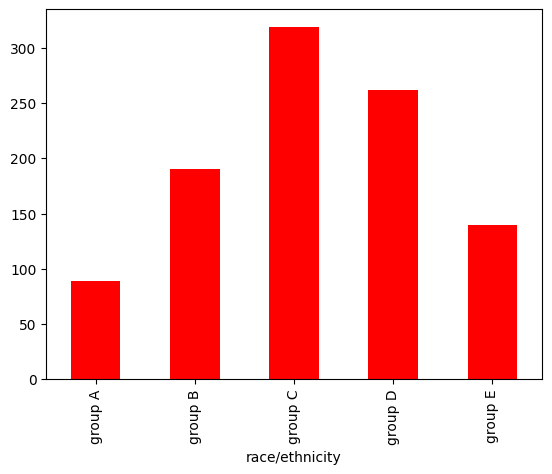

In [11]:
data.groupby('race/ethnicity').size().plot.bar(color='red') 

<Axes: xlabel='gender'>

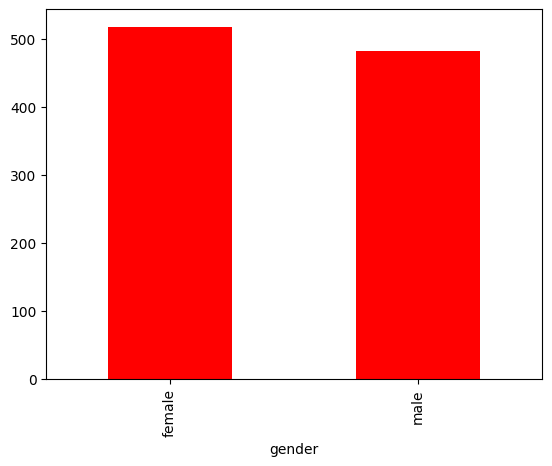

In [18]:
data.groupby('gender').size().plot.bar(color='red') 

<Axes: xlabel='parental level of education'>

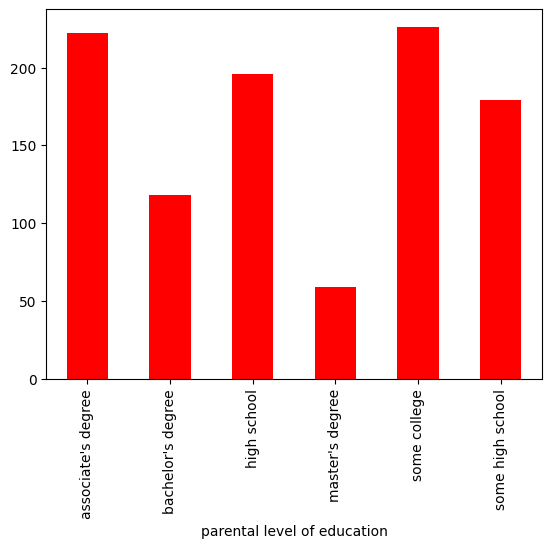

In [19]:
data.groupby('parental level of education').size().plot.bar(color='red') 

<Axes: xlabel='lunch'>

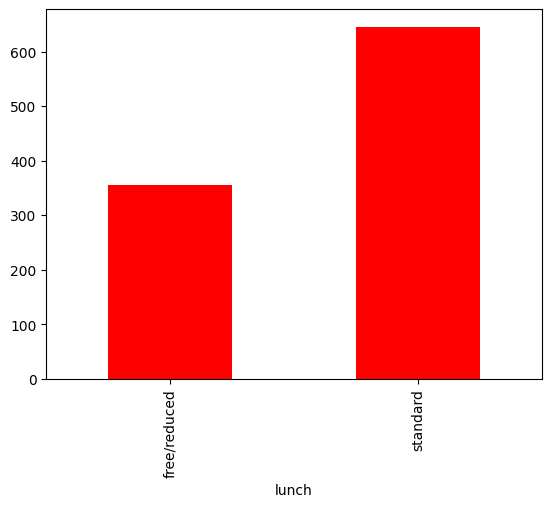

In [20]:
data.groupby('lunch').size().plot.bar(color='red') 

<Axes: xlabel='test preparation course'>

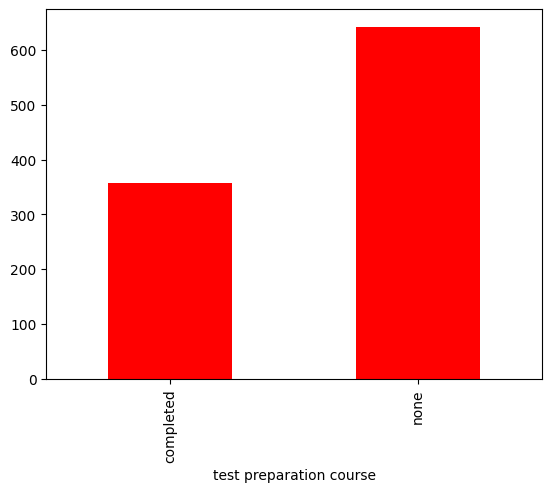

In [21]:
data.groupby('test preparation course').size().plot.bar(color='red') 

<Axes: xlabel='race/ethnicity,gender'>

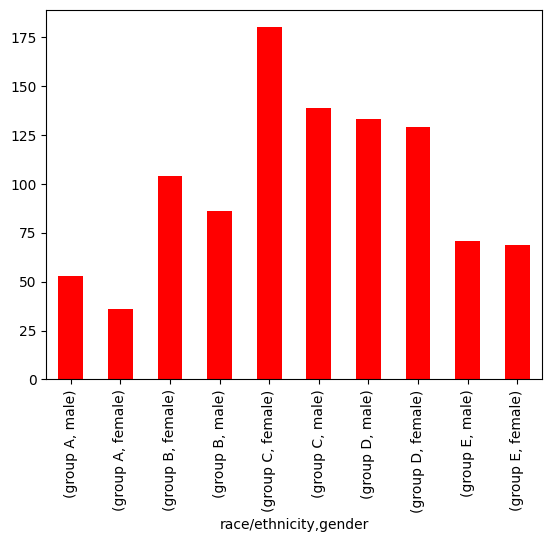

In [24]:
data.groupby('race/ethnicity')['gender'].value_counts().plot.bar(color='red') 

<Axes: xlabel='race/ethnicity,parental level of education'>

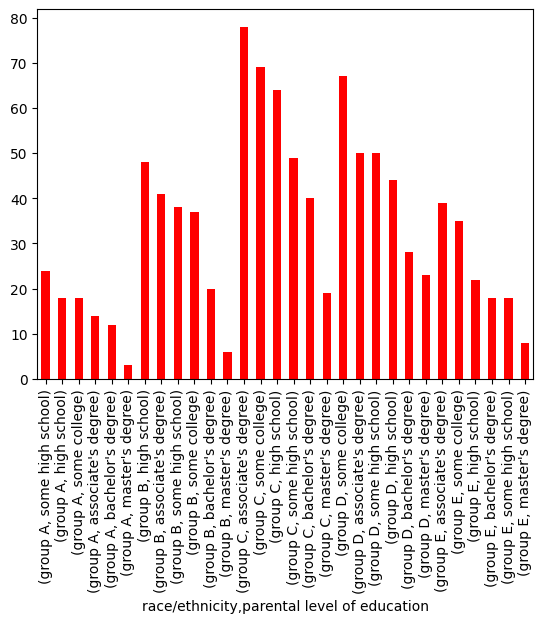

In [26]:
data.groupby('race/ethnicity')['parental level of education'].value_counts().plot.bar(color='red') 

<Axes: xlabel='test preparation course,race/ethnicity'>

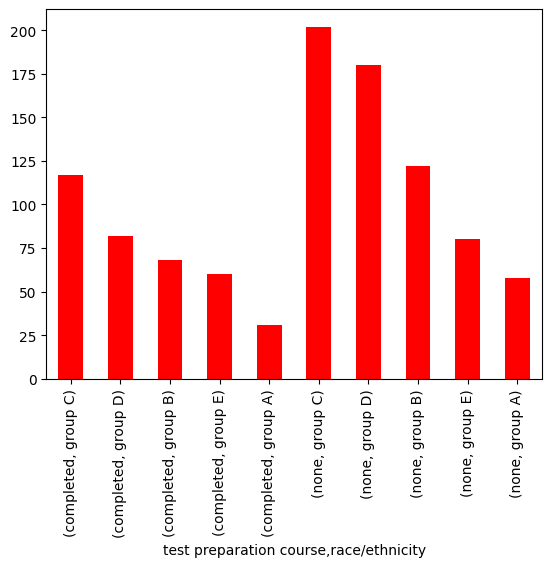

In [27]:
data.groupby('test preparation course')['race/ethnicity'].value_counts().plot.bar(color='red') 

In [46]:
bad_math_score = data[data['math score'] < 50]
bad_reading_score = data[data['reading score'] < 50]
bad_writing_score = data[data['writing score'] < 50]

In [47]:
bad_math_score.groupby('gender')['math score'].count().sort_values(ascending=False)

gender
female    86
male      49
Name: math score, dtype: int64

In [48]:
bad_math_score.groupby('parental level of education')['math score'].count().sort_values(ascending=False)

parental level of education
some high school      36
high school           33
associate's degree    27
some college          22
bachelor's degree     11
master's degree        6
Name: math score, dtype: int64

In [49]:
bad_math_score.groupby('race/ethnicity')['math score'].count().sort_values(ascending=False)

race/ethnicity
group C    45
group B    32
group D    29
group A    19
group E    10
Name: math score, dtype: int64

In [50]:
bad_math_score.groupby('test preparation course')['math score'].count().sort_values(ascending=False)

test preparation course
none         107
completed     28
Name: math score, dtype: int64

In [51]:
bad_reading_score.groupby('gender')['reading score'].count().sort_values(ascending=False)

gender
male      61
female    29
Name: reading score, dtype: int64

In [52]:
bad_reading_score.groupby('parental level of education')['reading score'].count().sort_values(ascending=False)

parental level of education
high school           27
some high school      22
some college          20
associate's degree    13
bachelor's degree      7
master's degree        1
Name: reading score, dtype: int64

In [53]:
bad_reading_score.groupby('race/ethnicity')['reading score'].count().sort_values(ascending=False)

race/ethnicity
group C    25
group B    23
group D    19
group A    15
group E     8
Name: reading score, dtype: int64

In [54]:
bad_reading_score.groupby('test preparation course')['reading score'].count().sort_values(ascending=False)

test preparation course
none         74
completed    16
Name: reading score, dtype: int64

In [55]:
bad_writing_score.groupby('gender')['writing score'].count().sort_values(ascending=False)

gender
male      83
female    31
Name: writing score, dtype: int64

In [56]:
bad_writing_score.groupby('parental level of education')['writing score'].count().sort_values(ascending=False)

parental level of education
high school           37
some high school      28
some college          22
associate's degree    17
bachelor's degree      9
master's degree        1
Name: writing score, dtype: int64

In [59]:
bad_writing_score.groupby('race/ethnicity')['writing score'].count().sort_values(ascending=False)

race/ethnicity
group C    32
group B    28
group D    23
group A    20
group E    11
Name: writing score, dtype: int64

In [60]:
bad_writing_score.groupby('test preparation course')['writing score'].count().sort_values(ascending=False)

test preparation course
none         98
completed    16
Name: writing score, dtype: int64

In [68]:
X = data.drop(columns=['math score', 'writing score', 'reading score'], axis=1)
y = data[['math score', 'writing score', 'reading score']]

In [16]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000
